#### 1.订单表的长度，shape,columns
#### 2.统计菜名的平均价格（amounts)
#### 3.什么菜最受欢迎
#### 4.哪个订单ID点的菜最多
#### ......

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif']='SimHei' #设置中文显示
%matplotlib inline

In [7]:
# 1.读取数据
data1=pd.read_excel(r'D:\DATA ANALYSIS\meal_order_detail.xlsx',sheet_name='meal_order_detail1')
data2=pd.read_excel(r'D:\DATA ANALYSIS\meal_order_detail.xlsx',sheet_name='meal_order_detail2')
data3=pd.read_excel(r'D:\DATA ANALYSIS\meal_order_detail.xlsx',sheet_name='meal_order_detail3')
# 2.数据预处理（合并数据，NA等处理），分析数据
data=pd.concat([data1,data2,data3],axis=0) # 按照行进行拼接数据
data.head(5)

,detail_id,order_id,dishes_id,logicprn_name,parent_class_name,dishes_name,itemis_add,counts,amounts,cost,place_order_time,discount_amt,discount_reason,kick_back,add_inprice,add_info,bar_code,picture_file,emp_id
0,2956,417,610062,NaN,NaN,蒜蓉生蚝,0,1,49,NaN,2016-08-01 11:05:36,NaN,NaN,NaN,0,NaN,NaN,caipu/104001.jpg,1442
1,2958,417,609957,NaN,NaN,蒙古烤羊腿,0,1,48,NaN,2016-08-01 11:07:07,NaN,NaN,NaN,0,NaN,NaN,caipu/202003.jpg,1442
2,2961,417,609950,NaN,NaN,大蒜苋菜,0,1,30,NaN,2016-08-01 11:07:40,NaN,NaN,NaN,0,NaN,NaN,caipu/303001.jpg,1442
3,2966,417,610038,NaN,NaN,芝麻烤紫菜,0,1,25,NaN,2016-08-01 11:11:11,NaN,NaN,NaN,0,NaN,NaN,caipu/105002.jpg,1442
4,2968,417,610003,NaN,NaN,蒜香包,0,1,13,NaN,2016-08-01 11:11:30,NaN,NaN,NaN,0,NaN,NaN,caipu/503002.jpg,1442


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10037 entries, 0 to 3610
Data columns (total 19 columns):
detail_id            10037 non-null int64
order_id             10037 non-null int64
dishes_id            10037 non-null int64
logicprn_name        0 non-null float64
parent_class_name    0 non-null float64
dishes_name          10037 non-null object
itemis_add           10037 non-null int64
counts               10037 non-null int64
amounts              10037 non-null int64
cost                 0 non-null float64
place_order_time     10037 non-null datetime64[ns]
discount_amt         0 non-null float64
discount_reason      0 non-null float64
kick_back            0 non-null float64
add_inprice          10037 non-null int64
add_info             0 non-null float64
bar_code             0 non-null float64
picture_file         10037 non-null object
emp_id               10037 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(8), object(2)
memory usage: 1.5+ MB


In [9]:
data.dropna(axis=1,inplace=True) # 按照列删除na列，并且修改源数据
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10037 entries, 0 to 3610
Data columns (total 11 columns):
detail_id           10037 non-null int64
order_id            10037 non-null int64
dishes_id           10037 non-null int64
dishes_name         10037 non-null object
itemis_add          10037 non-null int64
counts              10037 non-null int64
amounts             10037 non-null int64
place_order_time    10037 non-null datetime64[ns]
add_inprice         10037 non-null int64
picture_file        10037 non-null object
emp_id              10037 non-null int64
dtypes: datetime64[ns](1), int64(8), object(2)
memory usage: 1.2+ MB


In [14]:
# 统计卖出菜品的平均价格（amount求和/数量）
# round(data['amounts'].mean(),2) #方法一：pandas自带函数
round(np.mean(data['amounts']),2) #方法二：numpy函数处理（这种方法比较快）

44.82

In [16]:
# 频数统计，什么菜最受欢迎（对菜名进行频数统计，取最大前10名）
dishes_count=data['dishes_name'].value_counts()[:10] #对dishes_name这列进行值的数据统计,再取前10名
dishes_count

白饭/大碗        323
凉拌菠菜         269
谷稻小庄         239
麻辣小龙虾        216
辣炒鱿鱼         189
芝士烩波士顿龙虾     188
五色糯米饭(七色)    187
白饭/小碗        186
香酥两吃大虾       178
焖猪手          173
Name: dishes_name, dtype: int64

In [17]:
dishes_count.shape #这是一个一维数据，可以直接绘图

(10,)

0 323
1 269
2 239
3 216
4 189
5 188
6 187
7 186
8 178
9 173


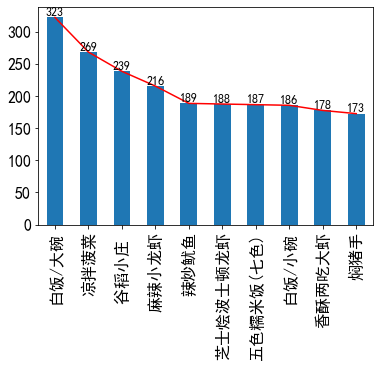

In [26]:
# 3. 数据可视化matplotlib
dishes_count.plot(kind='line',color=['r'])
dishes_count.plot(kind='bar',fontsize=16)
# 对dishes_count进行一个for循环
for x,y in enumerate(dishes_count):
    print(x,y)
    plt.text(x,y+2,y,ha='center',fontsize=12)# 用绘制文本的函数，x代表索引 ，y代表高度，绘制的文字是y值
                   # y+2代表高度上移2个位置，ha='center'表示横轴要居中显示

In [28]:
# 订单点菜的种类最多（1份白饭，1份香菜，1份小龙虾，3个种类；1份白饭，2份香菜，3份小龙虾，也是3个种类）
# 对订单id进行统计数量,然后取前10名
data_group=data['order_id'].value_counts()[:10]
data_group

398     36
1295    29
582     27
465     27
1078    27
1311    26
1033    25
426     24
777     24
769     24
Name: order_id, dtype: int64

Text(0, 0.5, '点菜种类')

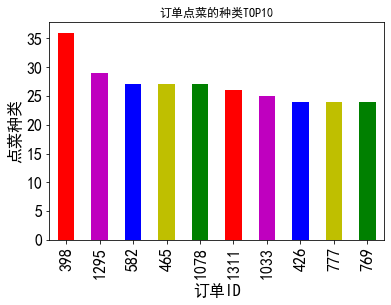

In [38]:
# 绘制可视化图形
data_group.plot(kind='bar',fontsize=16,color=['r','m','b','y','g'])
plt.title('订单点菜的种类TOP10')
plt.xlabel('订单ID',fontsize=16)
plt.ylabel('点菜种类',fontsize=16)
# 8月份餐厅订单点菜种类前10名，平均点菜25个菜品

In [40]:
# 订单ID点菜数量TOP10(对order_id分组，counts求和，然后排序，取前10)
data['total_amounts']=data['counts']*data['amounts']# 统计单道菜消费总额
dataGroup=data[['order_id','counts','amounts','total_amounts']].groupby(by='order_id') #取出这些列，然后按order_id分组
Group_sum=dataGroup.sum() # 按order_id分组后，分别求出其四列总和
sort_counts=Group_sum.sort_values(by='counts',ascending=False)# 对Group_sum里counts降序排序
sort_counts

,counts,amounts,total_amounts
order_id,,,
398,36,980,980
1033,33,1028,1083
1051,33,730,835
1318,31,1027,1076
557,30,957,1023
...,...,...,...
1029,3,123,123
1035,2,95,95
703,2,127,127


Text(0, 0.5, '点菜数量')

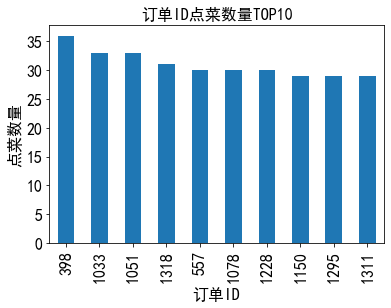

In [43]:
# 取出counts这列，取出前10名，然后进行可视化
sort_counts['counts'][:10].plot(kind='bar',fontsize=16)
plt.title('订单ID点菜数量TOP10',fontsize=16)
plt.xlabel('订单ID',fontsize=16)
plt.ylabel('点菜数量',fontsize=16)
# 8月份订单点菜数量前10名

In [44]:
# 哪个订单ID吃的钱最多（排序）
# 对Group_sum里total_amounts降序排序
sort_total_amounts=Group_sum.sort_values(by='total_amounts',ascending=False)
sort_total_amounts

,counts,amounts,total_amounts
order_id,,,
1166,24,1314,1314
1071,24,598,1282
1028,20,1112,1270
385,16,1125,1253
743,16,1214,1214
...,...,...,...
1256,6,77,84
1135,5,79,80
1320,1,78,78


Text(0, 0.5, '消费金额')

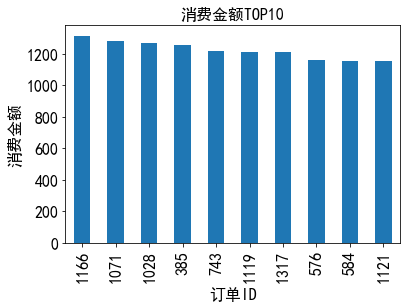

In [45]:
# 取出total_amounts这列，取出前10名，然后进行可视化
sort_total_amounts['total_amounts'][:10].plot(kind='bar',fontsize=16)
plt.title('消费金额TOP10',fontsize=16)
plt.xlabel('订单ID',fontsize=16)
plt.ylabel('消费金额',fontsize=16)

In [46]:
# 哪个订单ID平均消费最贵
Group_sum['average']=Group_sum['total_amounts']/Group_sum['counts']
Group_sum

,counts,amounts,total_amounts,average
order_id,,,,
137,9,194,197,21.888889
162,18,1032,1101,61.166667
163,10,182,217,21.700000
165,21,953,1147,54.619048
166,7,241,260,37.142857
...,...,...,...,...
1320,1,78,78,78.000000
1321,7,458,458,65.428571
1322,13,547,635,48.846154


In [47]:
# # 对Group_sum里average降序排序
sort_average=Group_sum.sort_values(by='average',ascending=False)
sort_average

,counts,amounts,total_amounts,average
order_id,,,,
168,9,423,1105,122.777778
909,4,471,471,117.750000
418,4,451,451,112.750000
891,7,715,715,102.142857
492,3,301,301,100.333333
...,...,...,...,...
1174,8,110,121,15.125000
632,10,126,140,14.000000
1256,6,77,84,14.000000


Text(0, 0.5, '消费单价')

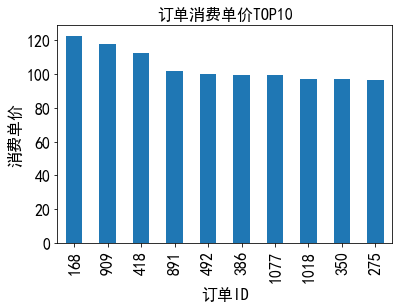

In [49]:
# 取出average这列，取出前10名，然后进行可视化
sort_average['average'][:10].plot(kind='bar',fontsize=16)
plt.title('订单消费单价TOP10',fontsize=16)
plt.xlabel('订单ID',fontsize=16)
plt.ylabel('消费单价',fontsize=16)

In [50]:
# 一天当中什么时间段，点菜量比较集中（hour)
data['hourcount']=1 # 添加新列，用作计数器
data['time']=pd.to_datetime(data['place_order_time'])# 将时间转换成日期类型存储到新列中
data['hour']=data['time'].map(lambda x:x.hour)
data

,detail_id,order_id,dishes_id,dishes_name,itemis_add,counts,amounts,place_order_time,add_inprice,picture_file,emp_id,total_amounts,hourcount,time,hour
0,2956,417,610062,蒜蓉生蚝,0,1,49,2016-08-01 11:05:36,0,caipu/104001.jpg,1442,49,1,2016-08-01 11:05:36,11
1,2958,417,609957,蒙古烤羊腿,0,1,48,2016-08-01 11:07:07,0,caipu/202003.jpg,1442,48,1,2016-08-01 11:07:07,11
2,2961,417,609950,大蒜苋菜,0,1,30,2016-08-01 11:07:40,0,caipu/303001.jpg,1442,30,1,2016-08-01 11:07:40,11
3,2966,417,610038,芝麻烤紫菜,0,1,25,2016-08-01 11:11:11,0,caipu/105002.jpg,1442,25,1,2016-08-01 11:11:11,11
4,2968,417,610003,蒜香包,0,1,13,2016-08-01 11:11:30,0,caipu/503002.jpg,1442,13,1,2016-08-01 11:11:30,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606,5683,672,610049,爆炒双丝,0,1,35,2016-08-31 21:53:30,0,caipu/301003.jpg,1089,35,1,2016-08-31 21:53:30,21
3607,5686,672,609959,小炒羊腰\r\n\r\n\r\n,0,1,36,2016-08-31 21:54:40,0,caipu/202005.jpg,1089,36,1,2016-08-31 21:54:40,21
3608,5379,647,610012,香菇鹌鹑蛋,0,1,39,2016-08-31 21:54:44,0,caipu/302001.jpg,1094,39,1,2016-08-31 21:54:44,21
3609,5380,647,610054,不加一滴油的酸奶蛋糕,0,1,7,2016-08-31 21:55:24,0,caipu/501003.jpg,1094,7,1,2016-08-31 21:55:24,21


In [51]:
# 对hour这列进行分组，然后统计数量，接着取出hourcount这列
gp_by_hour=data.groupby(by='hour').count()['hourcount']
gp_by_hour

hour
11     960
12     842
13     823
14     117
17    1092
18    1564
19    1464
20    1531
21    1469
22     175
Name: hourcount, dtype: int64

Text(0, 0.5, '点菜数量')

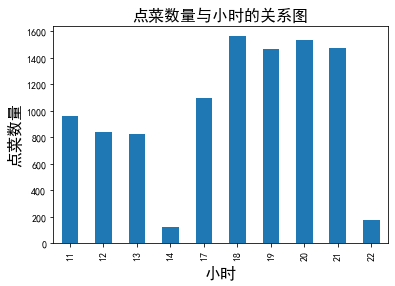

In [55]:
gp_by_hour.plot(kind='bar')
plt.title('点菜数量与小时的关系图',fontsize=16)
plt.xlabel('小时',fontsize=16)
plt.ylabel('点菜数量',fontsize=16)

In [53]:
# 哪一天订餐数量最多
data['daycount']=1 # 添加新列，用作计数器
data['day']=data['time'].map(lambda x:x.day) #解析出天
data

,detail_id,order_id,dishes_id,dishes_name,itemis_add,counts,amounts,place_order_time,add_inprice,picture_file,emp_id,total_amounts,hourcount,time,hour,daycount,day
0,2956,417,610062,蒜蓉生蚝,0,1,49,2016-08-01 11:05:36,0,caipu/104001.jpg,1442,49,1,2016-08-01 11:05:36,11,1,1
1,2958,417,609957,蒙古烤羊腿,0,1,48,2016-08-01 11:07:07,0,caipu/202003.jpg,1442,48,1,2016-08-01 11:07:07,11,1,1
2,2961,417,609950,大蒜苋菜,0,1,30,2016-08-01 11:07:40,0,caipu/303001.jpg,1442,30,1,2016-08-01 11:07:40,11,1,1
3,2966,417,610038,芝麻烤紫菜,0,1,25,2016-08-01 11:11:11,0,caipu/105002.jpg,1442,25,1,2016-08-01 11:11:11,11,1,1
4,2968,417,610003,蒜香包,0,1,13,2016-08-01 11:11:30,0,caipu/503002.jpg,1442,13,1,2016-08-01 11:11:30,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606,5683,672,610049,爆炒双丝,0,1,35,2016-08-31 21:53:30,0,caipu/301003.jpg,1089,35,1,2016-08-31 21:53:30,21,1,31
3607,5686,672,609959,小炒羊腰\r\n\r\n\r\n,0,1,36,2016-08-31 21:54:40,0,caipu/202005.jpg,1089,36,1,2016-08-31 21:54:40,21,1,31
3608,5379,647,610012,香菇鹌鹑蛋,0,1,39,2016-08-31 21:54:44,0,caipu/302001.jpg,1094,39,1,2016-08-31 21:54:44,21,1,31
3609,5380,647,610054,不加一滴油的酸奶蛋糕,0,1,7,2016-08-31 21:55:24,0,caipu/501003.jpg,1094,7,1,2016-08-31 21:55:24,21,1,31


In [54]:
# 对day这列进行分组，然后统计数量，接着取出daycount这列
gp_by_day=data.groupby(by='day').count()['daycount']
gp_by_day

day
1     217
2     138
3     157
4     144
5     193
6     706
7     696
8     160
9     146
10    222
11    176
12    177
13    756
14    691
15    211
16    103
17    206
18    214
19    226
20    887
21    778
22    146
23    180
24    145
25    136
26    200
27    725
28    814
29    148
30    154
31    185
Name: daycount, dtype: int64

Text(0, 0.5, '点菜数量')

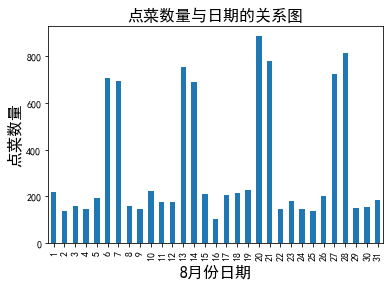

In [56]:
gp_by_day.plot(kind='bar')
plt.title('点菜数量与日期的关系图',fontsize=16)
plt.xlabel('8月份日期',fontsize=16)
plt.ylabel('点菜数量',fontsize=16)

In [ ]:
# 我们还可以对点菜量排序，取点菜量最大的前5天

In [58]:
# 查看星期几人数最多，订餐数最多，映射数据到星期
data['weekcount']=1
data['weekday']=data['time'].map(lambda x:x.weekday())
data

,detail_id,order_id,dishes_id,dishes_name,itemis_add,counts,amounts,place_order_time,add_inprice,picture_file,emp_id,total_amounts,hourcount,time,hour,daycount,day,weekcount,weekday
0,2956,417,610062,蒜蓉生蚝,0,1,49,2016-08-01 11:05:36,0,caipu/104001.jpg,1442,49,1,2016-08-01 11:05:36,11,1,1,1,0
1,2958,417,609957,蒙古烤羊腿,0,1,48,2016-08-01 11:07:07,0,caipu/202003.jpg,1442,48,1,2016-08-01 11:07:07,11,1,1,1,0
2,2961,417,609950,大蒜苋菜,0,1,30,2016-08-01 11:07:40,0,caipu/303001.jpg,1442,30,1,2016-08-01 11:07:40,11,1,1,1,0
3,2966,417,610038,芝麻烤紫菜,0,1,25,2016-08-01 11:11:11,0,caipu/105002.jpg,1442,25,1,2016-08-01 11:11:11,11,1,1,1,0
4,2968,417,610003,蒜香包,0,1,13,2016-08-01 11:11:30,0,caipu/503002.jpg,1442,13,1,2016-08-01 11:11:30,11,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606,5683,672,610049,爆炒双丝,0,1,35,2016-08-31 21:53:30,0,caipu/301003.jpg,1089,35,1,2016-08-31 21:53:30,21,1,31,1,2
3607,5686,672,609959,小炒羊腰\r\n\r\n\r\n,0,1,36,2016-08-31 21:54:40,0,caipu/202005.jpg,1089,36,1,2016-08-31 21:54:40,21,1,31,1,2
3608,5379,647,610012,香菇鹌鹑蛋,0,1,39,2016-08-31 21:54:44,0,caipu/302001.jpg,1094,39,1,2016-08-31 21:54:44,21,1,31,1,2
3609,5380,647,610054,不加一滴油的酸奶蛋糕,0,1,7,2016-08-31 21:55:24,0,caipu/501003.jpg,1094,7,1,2016-08-31 21:55:24,21,1,31,1,2


Text(0, 0.5, '点菜数量')

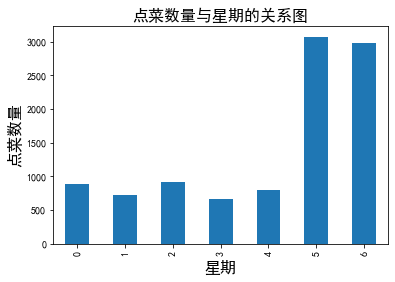

In [59]:
# 对weekday这列进行分组，然后统计数量，接着取出weekcount这列
gp_by_weekday=data.groupby(by='weekday').count()['weekcount']
gp_by_weekday.plot(kind='bar')
plt.title('点菜数量与星期的关系图',fontsize=16)
plt.xlabel('星期',fontsize=16)
plt.ylabel('点菜数量',fontsize=16)
# 0代表星期1，5，6代表周六周日

In [ ]:
# shell 工具：git bash(下载)，对比cmd:几乎接近linux命令
# jupyter lab是jupyter notebook升级版
# 不同维度进行数据分析：
# 针对订单order_id:1.什么菜最受欢迎 2.点菜的各类 3.点菜的数量 4.消费金额最大 5.平均消费
# 针对时间日期进行分析：1.点菜量比较集中的时间 2哪一天订餐量最大 3.星期几就餐人数最多
# 技术点：1.拼接数据pd.condcat([列1，...]) 2.分组进行统计（分组求和）-最重要的3.排序 ，切片 TOP10 4.绘制柱状图走势和高度
          